In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/dataset.zip"

extract_path = "/content"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Successfully unzipped '{zip_file_path}' to '{extract_path}'")


Successfully unzipped '/content/drive/MyDrive/dataset.zip' to '/content/dataset'


In [18]:
import os
import cv2
import xml.etree.ElementTree as ET
from IPython.display import display
from PIL import Image

In [24]:
def extract_rois_from_dataset(base_path, save_dir, target_classes=["person-noseatbelt", "person-seatbelt", "windshield"]):
    splits = ['train', 'valid', 'test']

    for split in splits:
        image_dir = os.path.join(base_path, split)
        split_save_dir = os.path.join(save_dir, split)
        os.makedirs(split_save_dir, exist_ok=True)

        print(f"\n📂 Processing split: {split}")

        for file in os.listdir(image_dir):
            if not file.endswith(".xml"):
                continue

            xml_path = os.path.join(image_dir, file)
            image_path = os.path.join(image_dir, file.replace(".xml", ".jpg"))

            # Load image
            image = cv2.imread(image_path)
            if image is None:
                print(f"⚠️ Could not load image: {image_path}")
                continue

            # Parse XML
            try:
                tree = ET.parse(xml_path)
                root = tree.getroot()
            except Exception as e:
                print(f"⚠️ Error parsing XML: {xml_path} — {e}")
                continue

            filename_base = os.path.splitext(file)[0]

            for idx, obj in enumerate(root.findall("object")):
                label = obj.find("name").text
                if label not in target_classes:
                    continue

                bndbox = obj.find("bndbox")
                xmin = int(bndbox.find("xmin").text)
                xmax = int(bndbox.find("xmax").text)
                ymin = int(bndbox.find("ymin").text)
                ymax = int(bndbox.find("ymax").text)

                height, width = image.shape[:2]
                xmin = max(0, min(xmin, width - 1))
                xmax = max(0, min(xmax, width - 1))
                ymin = max(0, min(ymin, height - 1))
                ymax = max(0, min(ymax, height - 1))

                if xmax <= xmin or ymax <= ymin:
                    print(f"⚠️ Skipped invalid bbox in {image_path}: ({xmin}, {ymin}, {xmax}, {ymax})")
                    continue

                roi = image[ymin:ymax, xmin:xmax]
                if roi.size == 0:
                    print(f"⚠️ Empty ROI from {image_path}: {xmin}, {ymin}, {xmax}, {ymax}")
                    continue

                roi_filename = f"{filename_base}_{label}_{idx}.jpg"
                roi_path = os.path.join(split_save_dir, roi_filename)
                cv2.imwrite(roi_path, roi)
                print(f"✅ Saved ROI: {roi_path}")


    print(f"\n🎉 All ROIs saved to: {save_dir}")


In [25]:
extract_rois_from_dataset(
    base_path="dataset",
    save_dir="cropped_rois",
    target_classes=["person-noseatbelt", "person-seatbelt", "windshield"]
)


Streaming output truncated to the last 5000 lines.
✅ Saved ROI: cropped_rois/train/frame_001053eeeeee-32-_jpg.rf.c5bd252855789493f91c8bfdfca04656_windshield_0.jpg
✅ Saved ROI: cropped_rois/train/frame_001053eeeeee-32-_jpg.rf.c5bd252855789493f91c8bfdfca04656_person-seatbelt_1.jpg
✅ Saved ROI: cropped_rois/train/1625227980627_jpg.rf.48343ff01ce6d903bdee42d08100684e_windshield_0.jpg
✅ Saved ROI: cropped_rois/train/1625227980627_jpg.rf.48343ff01ce6d903bdee42d08100684e_person-seatbelt_1.jpg
✅ Saved ROI: cropped_rois/train/847_png_jpg.rf.a0b5bfa150864d1330dd8a352c3d6051_windshield_0.jpg
✅ Saved ROI: cropped_rois/train/847_png_jpg.rf.a0b5bfa150864d1330dd8a352c3d6051_person-noseatbelt_1.jpg
✅ Saved ROI: cropped_rois/train/1_CAR_13-49-43-640_jpg.rf.8611d063fc5791d34f5df5f068edb3a5_person-noseatbelt_0.jpg
✅ Saved ROI: cropped_rois/train/1_CAR_13-49-43-640_jpg.rf.8611d063fc5791d34f5df5f068edb3a5_windshield_1.jpg
✅ Saved ROI: cropped_rois/train/848_png_jpg.rf.bd40d6a56c03587bf9aa9e1abb50d764_winds

### 📂 Train — Showing 5 Samples

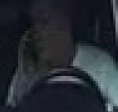

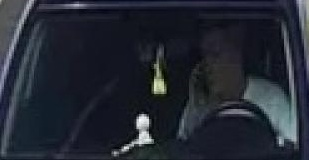

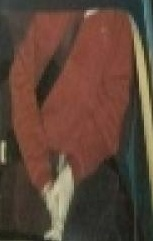

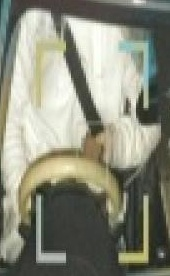

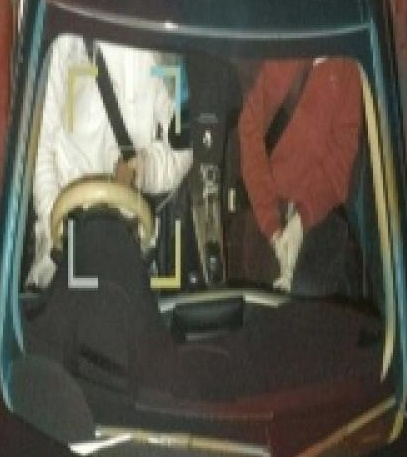

### 📂 Valid — Showing 5 Samples

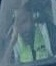

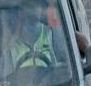

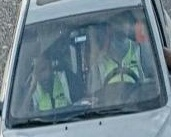

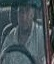

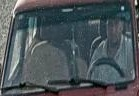

### 📂 Test — Showing 5 Samples

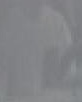

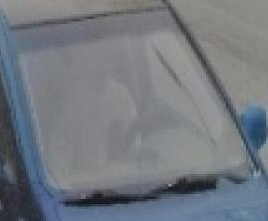

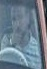

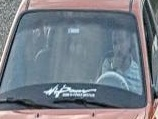

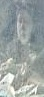

In [26]:
from glob import glob
import os
from IPython.display import display, Markdown
from PIL import Image

splits = ['train', 'valid', 'test']
base_dir = "cropped_rois"

for split in splits:
    split_dir = os.path.join(base_dir, split)
    image_paths = sorted(glob(os.path.join(split_dir, "*.jpg")))[:5]

    display(Markdown(f"### 📂 {split.capitalize()} — Showing {len(image_paths)} Samples"))

    if not image_paths:
        print(f"No images found in {split_dir}")
        continue

    for img_path in image_paths:
        display(Image.open(img_path))


In [27]:
!zip -r /content/cropped_rois.zip /content/cropped_rois
!cp /content/cropped_rois.zip /content/drive/MyDrive/

print("\n✅ 'cropped_rois' folder zipped and uploaded to your Google Drive.")


Streaming output truncated to the last 5000 lines.
  adding: content/cropped_rois/train/1_CAR_12-23-04-415_jpg.rf.aab4b4a85851d5c27b9c90400b14ab66_windshield_2.jpg (deflated 1%)
  adding: content/cropped_rois/train/1_TRUCK_13-07-12-994_jpg.rf.461a9517e8e0332f339dc3984a62e8b3_windshield_0.jpg (deflated 1%)
  adding: content/cropped_rois/train/1_CAR_12-50-48-154_jpg.rf.4cf9a688bf8bfca172e76e9df7fabe81_person-seatbelt_1.jpg (deflated 2%)
  adding: content/cropped_rois/train/1625227980840_jpg.rf.a7701167912f94bf47ed37a408cc8ad6_windshield_0.jpg (deflated 1%)
  adding: content/cropped_rois/train/05-10-42_jpg.rf.c6c53e9b1037878345944545ef5d4cf2_windshield_0.jpg (deflated 1%)
  adding: content/cropped_rois/train/frame_000900mm-39-_jpg.rf.d635d15662ee8ce3a5425a9822eba0e0_person-noseatbelt_1.jpg (deflated 7%)
  adding: content/cropped_rois/train/907_png_jpg.rf.7d4fc8738600487e83bc1a926a270363_person-noseatbelt_1.jpg (deflated 7%)
  adding: content/cropped_rois/train/bKRNEr7lL3Y_jpg.rf.5b21a90b7